In [196]:
import sys
sys.path.append('../')

import pickle

with open('/local/scratch_2/jls/virac_classifier/variable/edr3/variable_classifier.pkl', 'rb') as f:
    var = pickle.load(f)
with open('/local/scratch_2/jls/virac_classifier/variable/edr3/variable_training_set.pkl', 'rb') as f:
    var_dataset_scaled = pickle.load(f)
with open('/local/scratch_2/jls/virac_classifier/variable/edr3/variable_features_total.pkl', 'rb') as f:
    var_dataset_full = pickle.load(f)
with open('/local/scratch_2/jls/virac_classifier/variable/edr3/variable_features_mira.pkl', 'rb') as f:
    mira_features = pickle.load(f)
var_dataset_full = pd.concat([var_dataset_full, mira_features], axis=0)
var_dataset = var_dataset_full.merge(var_dataset_scaled[['sourceid', 'class', 'prob']], on='sourceid')
var_dataset_full = var_dataset_full[(~var_dataset_full['error'])].reset_index(drop=True)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [197]:
sorted(var.feature_importance.items(), key=lambda x:x[1])[::-1]

[('lsq_period', 0.12904053839997331),
 ('delta_loglik', 0.04879718564690401),
 ('amp_0', 0.048497151056161474),
 ('log10_fap', 0.046011214743877635),
 ('amp_double_1', 0.045463661819905646),
 ('JK_col', 0.03813543138794588),
 ('pow_mean_disp', 0.037035201008169136),
 ('HK_col', 0.03504452535227125),
 ('a0_a1', 0.03448633945733871),
 ('peak_ratio_model', 0.03338630742511589),
 ('amp_1', 0.02715817295061586),
 ('ks_mad', 0.025408341701740333),
 ('max_pow', 0.024762563709139176),
 ('ks_eta', 0.022562582079572183),
 ('ks_p75_p25', 0.020854547139374926),
 ('ks_stetson_i', 0.020614011591431378),
 ('ks_stetson_j', 0.02014108862240107),
 ('ks_mad_over_error', 0.019464334013684925),
 ('ks_p95_p5', 0.01838751301389397),
 ('a0_a3', 0.01825949094015336),
 ('ks_p84_p16', 0.017473753265526824),
 ('amp_double_3', 0.01706465205175905),
 ('ks_p84_p16_over_error', 0.016885588896511396),
 ('ks_p75_p25_over_error', 0.016210260492367293),
 ('ks_stdev_over_error', 0.014445679946516451),
 ('amp_3', 0.0131962

In [198]:
len(var_dataset), len(var_dataset_full)

(150863, 440828)

In [199]:
fltr = (var_dataset_full['log10_fap']<-10)&(
        ~((var_dataset_full['var_class']=='EA/EB')&~(var_dataset_full['significant_second_minimum'])))

In [200]:
np.count_nonzero((var_dataset_full['var_class']=='MIRA'))

750

/data/jls/python3.5/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/data/jls/python3.5/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


[]

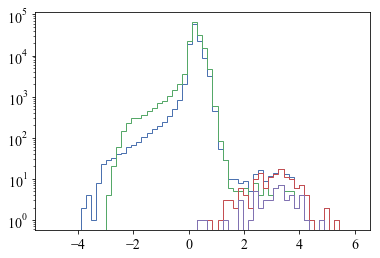

In [201]:
plt.hist(var_dataset_full['JK_col'][fltr],bins=60,range=[-5,6],histtype='step');
plt.hist(var_dataset['JK_col'],bins=60,range=[-5,6],histtype='step');

plt.hist(var_dataset_full['JK_col'][fltr&(var_dataset_full['var_class']=='MIRA')],bins=60,range=[-5,6],histtype='step');
plt.hist(var_dataset['JK_col'][(var_dataset['var_class']=='MIRA')],bins=60,range=[-5,6],histtype='step');

# plt.hist(var_dataset['HK_col'],bins=160,range=[-5,5],histtype='step');
plt.semilogy()

[]

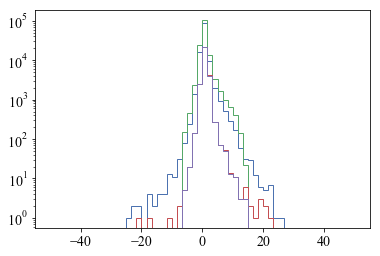

In [154]:
plt.hist(var_dataset_full['ks_skew'][fltr],bins=60,range=[-50,50],histtype='step');
plt.hist(var_dataset['ks_skew'],bins=60,range=[-50,50],histtype='step');

plt.hist(var_dataset_full['ks_skew'][fltr&(var_dataset_full['var_class']=='EA/EB')],bins=60,range=[-50,50],histtype='step');
plt.hist(var_dataset['ks_skew'][(var_dataset['var_class']=='EA/EB')],bins=60,range=[-50,50],histtype='step');

# plt.hist(var_dataset['HK_col'],bins=160,range=[-5,5],histtype='step');
plt.semilogy()

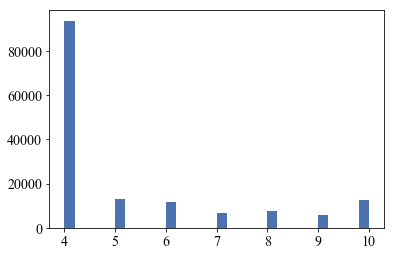

In [207]:
plt.hist(var_dataset['lsq_nterms'],bins=30);

In [202]:
var.cr

{'CEP': {'f1-score': 0.47445255474452547,
  'precision': 0.3816046966731898,
  'recall': 0.6270096463022508,
  'support': 311},
 'CONST': {'f1-score': 0.9906325893373424,
  'precision': 0.9975544427623151,
  'recall': 0.9838061329964396,
  'support': 34828},
 'EA/EB': {'f1-score': 0.9398708705108664,
  'precision': 0.9089704518351663,
  'recall': 0.9729461404815091,
  'support': 28203},
 'EW': {'f1-score': 0.9193644441268253,
  'precision': 0.9608624209530449,
  'recall': 0.8813025210084033,
  'support': 43792},
 'Ell': {'f1-score': 0.7521492434662997,
  'precision': 0.7823482071000626,
  'recall': 0.724195016968794,
  'support': 12081},
 'LPV': {'f1-score': 0.7622203811101905,
  'precision': 0.672514619883041,
  'recall': 0.8795411089866156,
  'support': 523},
 'RRab': {'f1-score': 0.9379696740628751,
  'precision': 0.965621423666743,
  'recall': 0.9118575195608006,
  'support': 23133},
 'RRcd': {'f1-score': 0.7179127809821574,
  'precision': 0.5978631711258754,
  'recall': 0.89828679

In [203]:
from initial_classif.classifier.classifier import ConfusionMatrixDisplay

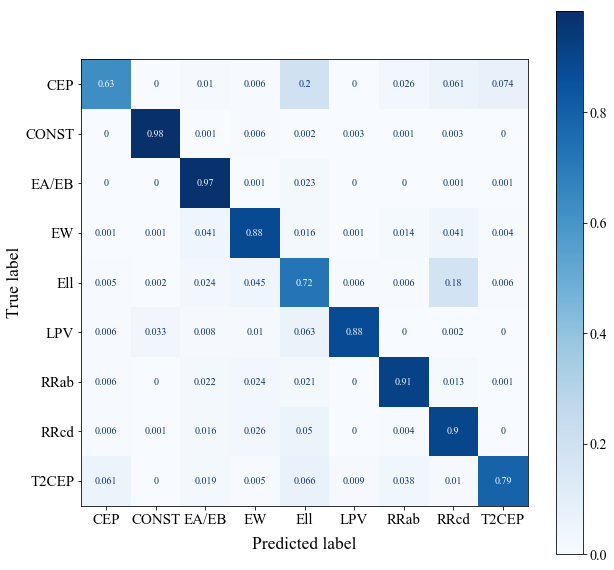

In [204]:
displ = ConfusionMatrixDisplay(confusion_matrix=np.around(var.cm/np.nansum(var.cm,axis=1)[:,np.newaxis], decimals=3),
                                       display_labels=['CEP', 'CONST', 'EA/EB', 'EW', 'Ell', 'LPV', 'RRab', 'RRcd', 'T2CEP'])
disp = displ.plot(include_values=True, cmap=plt.cm.Blues, 
                  ax=None, xticks_rotation='horizontal',
                  values_format=None)

fig = disp.figure_
ax = disp.ax_
im = disp.im_
fig.set_size_inches(10,10)
ax.set_xlabel('Predicted label',family='serif', fontsize=17.5, labelpad=10)
ax.set_ylabel('True label',family='serif', fontsize=17.5, labelpad=2)
#ax.tick_params(labelsize=15)
import matplotlib
ticks_font = matplotlib.font_manager.FontProperties(family='serif',
                                                            style='normal', size=15,
                                                            weight='normal', stretch='normal')
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

[]

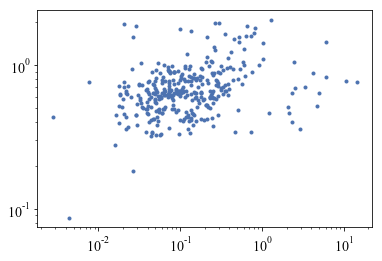

In [194]:
plt.plot(var_dataset['amp_0'][var_dataset['var_class']=='MIRA'],
        var_dataset['ks_p95_p5'][var_dataset['var_class']=='MIRA'],'.')
plt.semilogy()
plt.semilogx()

[]

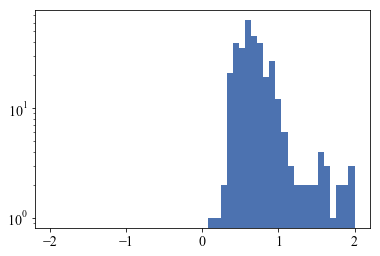

In [195]:
plt.hist(var_dataset['ks_p95_p5'][var_dataset['var_class']=='MIRA'],range=[-2,2],bins=50);
plt.semilogy()

In [15]:
np.unique(var_dataset['var_class'])

array(['CEP', 'CONST', 'DSCT', 'EA/EB', 'EW', 'Ell', 'MIRA', 'OSARG',
       'RRab', 'RRc', 'RRd', 'SRV', 'T2CEP'], dtype=object)

In [14]:
fltr = (var_dataset['var_class']=='LPV')&(var_dataset['log10_fap']<-10)#&(var_dataset['significant_second_minimum'])
np.count_nonzero((var_dataset['class']==var_dataset['var_class'])[fltr]) / np.count_nonzero(fltr)

ZeroDivisionError: division by zero

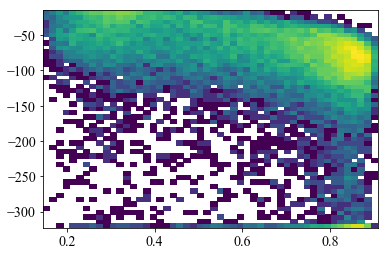

In [131]:
plt.hist2d(var_dataset['prob'][var_dataset['var_class']=='RRab'],
           var_dataset['log10_fap'][var_dataset['var_class']=='RRab'],bins=50,norm=LogNorm());

In [108]:
with open('/local/scratch_2/jls/virac_classifier/binary/edr3/binary_training_set_25.pkl', 'rb') as f:
    binr = pickle.load(f)

/data/jls/python3.5/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


[]

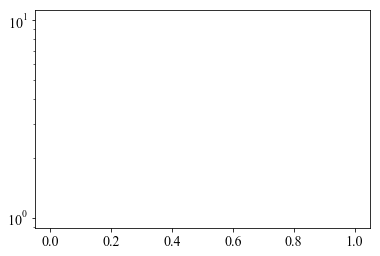

In [126]:

# plt.hist(np.float64(binr.training_set['prob'].values)[
#         (binr.training_set['var_class'].values=='VAR')&(binr.training_set['class'].values=='VAR')
#         ],
#         bins=50);
plt.hist(np.float64(binr.training_set['prob'].values)[
        (binr.training_set['var_class'].values=='VAR')&(binr.training_set['class'].values=='VAR')
        &(binr.training_set['detailed_var_class']=='CONST')],
        bins=50);
plt.semilogy()

In [121]:
np.count_nonzero((binr.training_set['var_class'].values=='VAR')&(binr.training_set['class'].values=='VAR')
                &(binr.training_set['prob']>0.6))/np.count_nonzero((binr.training_set['var_class'].values=='VAR')&(binr.training_set['class'].values=='VAR'))

0.9605704142897007